In [31]:
# Alex Zhang 512910

In [32]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [33]:
df = pd.read_csv('lab06_customers.csv')
print(df.head())

       race    income     sex  schoolYears   age   spend
0     white  157966.0    male         18.0  31.0  659.97
1     white   11134.0  female         14.0  50.0  719.69
2  hispanic  555369.0    male         14.0  32.0  854.61
3     white  272387.0  female         18.0  52.0  855.20
4     white  105459.0  female         17.0  49.0  758.33


In [34]:
categorical = ['race', 'sex', 'schoolYears']

for col in categorical:
    print(df[col].value_counts(normalize=True))
    
print(df.describe())

white       0.5771
hispanic    0.1405
black       0.1163
other       0.1094
asian       0.0567
Name: race, dtype: float64
male      0.5006
female    0.4982
other     0.0012
Name: sex, dtype: float64
15.0    0.1576
14.0    0.1574
16.0    0.1511
17.0    0.1268
13.0    0.1171
18.0    0.0952
12.0    0.0776
19.0    0.0555
11.0    0.0359
20.0    0.0144
10.0    0.0080
21.0    0.0024
9.0     0.0009
22.0    0.0001
Name: schoolYears, dtype: float64
             income   schoolYears           age         spend
count  1.000000e+04  10000.000000  10000.000000  10000.000000
mean   8.531690e+04     15.186000     41.982300    755.376206
std    1.096255e+05      2.225151      8.967498    115.994785
min    1.195000e+03      9.000000     18.000000    331.580000
25%    2.649025e+04     14.000000     34.000000    692.212500
50%    5.215300e+04     15.000000     42.000000    761.120000
75%    1.011165e+05     17.000000     50.000000    818.847500
max    2.100000e+06     22.000000     67.000000   1329.340000

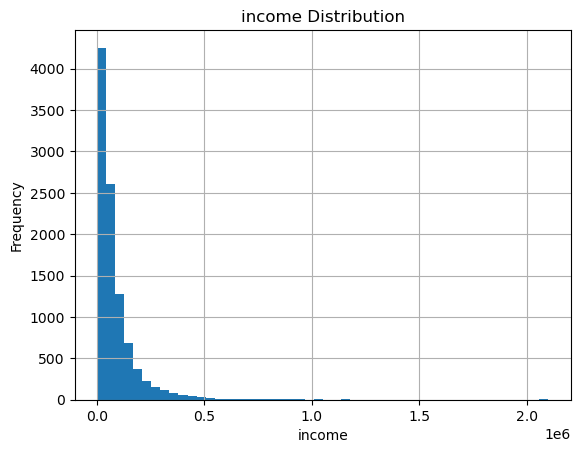

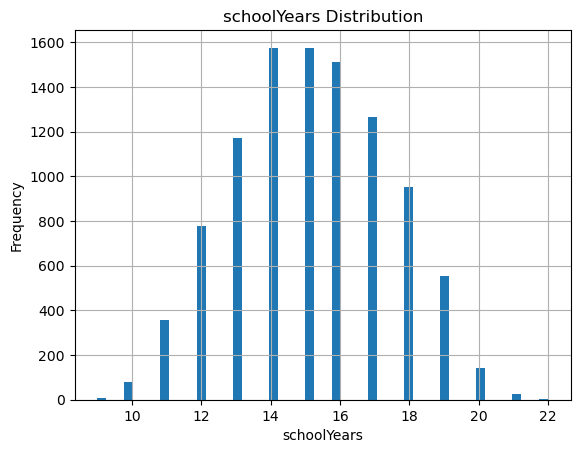

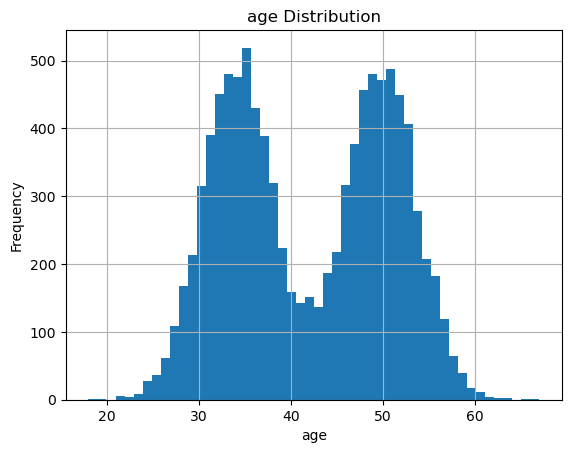

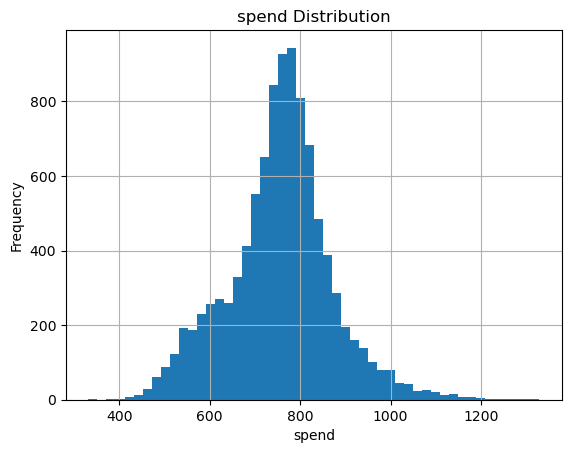

In [35]:
continuous_vars = ['income', 'schoolYears', 'age', 'spend']

for var in continuous_vars:
    plt.figure()
    df[var].hist(bins=50)
    plt.title(f'{var} Distribution')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

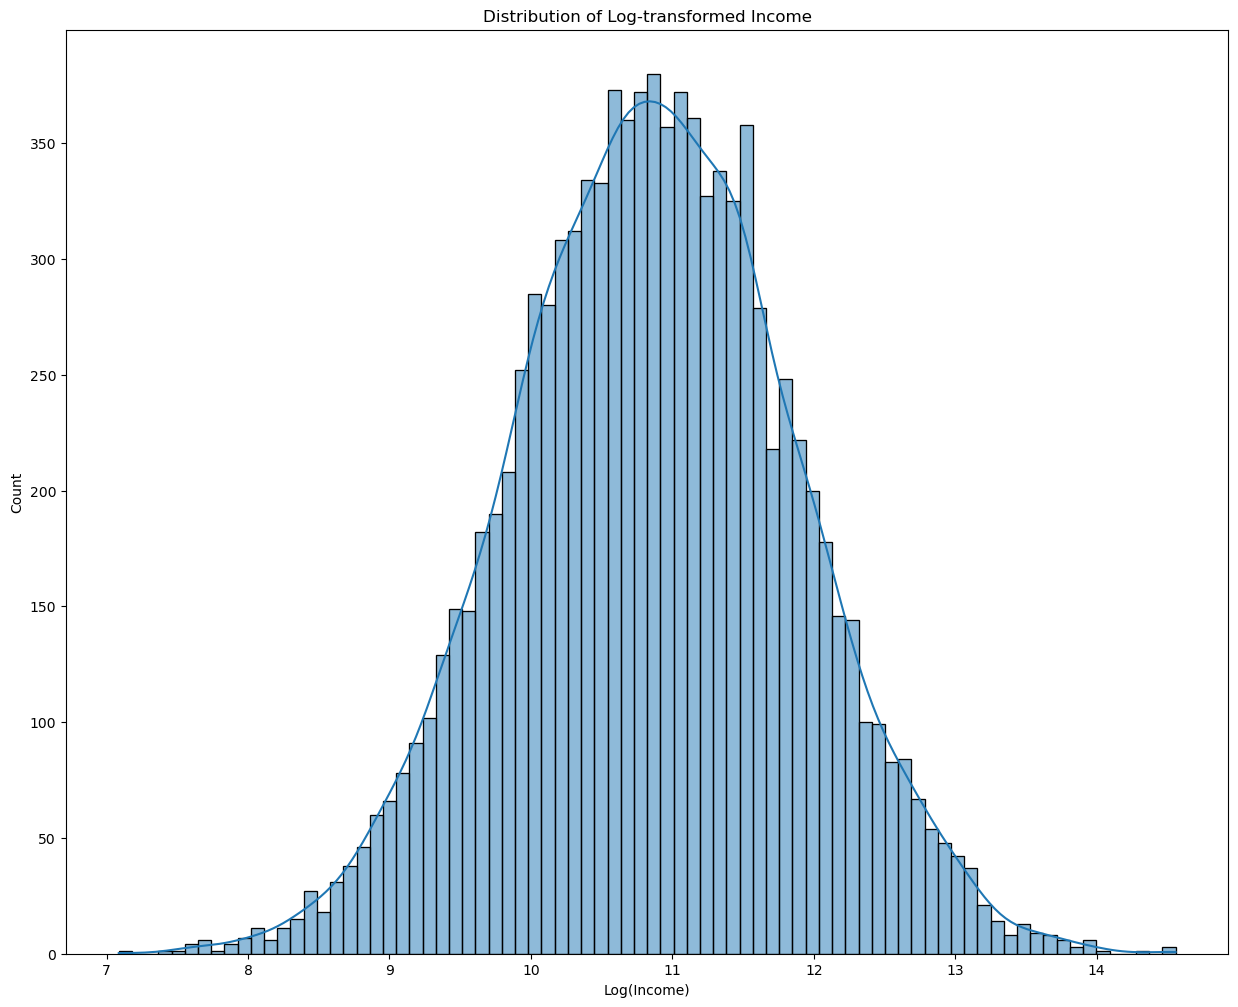

In [36]:
df['income_log'] = np.log(df['income'])

plt.figure(figsize=(15, 12))
sns.histplot(df['income_log'], kde=True, bins=80)
plt.title("Distribution of Log-transformed Income")
plt.xlabel("Log(Income)")
plt.ylabel("Count")
plt.show()

In [37]:
avg_race_spend = df.groupby('race')['spend'].mean()
avg_race_spend

race
asian       809.523739
black       643.611900
hispanic    824.047573
other       749.296161
white       757.013450
Name: spend, dtype: float64

In [38]:
avg_sex_spend = df.groupby('sex')['spend'].mean()
avg_sex_spend

sex
female    752.957477
male      758.359736
other     514.922500
Name: spend, dtype: float64

In [39]:
model = ols('spend ~ race * sex', data=df).fit()

interaction_anova = sm.stats.anova_lm(model, typ=3)
print(interaction_anova)
print(model.summary())

pivot_table = df.pivot_table(index='race', columns='sex', values='spend', aggfunc='mean')
print(pivot_table)

                 sum_sq      df             F        PR(>F)
Intercept  2.089632e+08     1.0  22809.838124  0.000000e+00
race       2.915947e+07     4.0    795.741432  0.000000e+00
sex        3.677527e+06     2.0    200.714237  3.446613e-86
race:sex   2.011607e+07     8.0    274.476667  0.000000e+00
Residual   9.148275e+07  9986.0           NaN           NaN
                            OLS Regression Results                            
Dep. Variable:                  spend   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     361.5
Date:                Thu, 05 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:01:49   Log-Likelihood:                -59796.
No. Observations:               10000   AIC:                         1.196e+05
Df Residuals:                    9986   BIC:                         1.197e+05
Df Model

In [40]:
# The interaction between race and sex (race:sex) has a significant p-value (essentially 0), 
# suggesting that the interaction effect is statistically significant.

In [41]:
# P-value for Hispanic Men (from the regression output): Very close to 0.
# P-value for Black Women (from the regression output): Very close to 0.
# Adjusted R2 from the model: 0.319

In [42]:
pivot_table_spend = df.pivot_table(values='spend', index='race', columns='sex', aggfunc='mean')
pivot_table_spend

sex,female,male,other
race,,,
asian,893.067481,737.758295,NaN
black,559.065377,733.230018,483.65000
hispanic,764.879042,885.757330,446.44500
other,769.271450,730.775694,550.92000
white,774.441770,740.205425,531.45125


In [43]:
# There is a significant difference in spending between Hispanic men and Black women.
# Hispanic men tend to spend more on average compared to Black women.

In [44]:
hispanic_men_predicted_spend = model.params["Intercept"] + model.params["race[T.hispanic]"] + model.params["sex[T.male]"] + model.params["race[T.hispanic]:sex[T.male]"]
black_women_predicted_spend = model.params["Intercept"] + model.params["race[T.black]"]
hispanic_men_predicted_spend, black_women_predicted_spend

(885.7573304473328, 559.065376884423)

In [45]:
model_3way = ols('spend ~ race * sex * schoolYears', data=df).fit()

interaction_anova_3way = sm.stats.anova_lm(model_3way, typ=3)
print(interaction_anova_3way)
print(model_3way.summary())

                            sum_sq      df           F        PR(>F)
Intercept             1.385477e+06     1.0  155.574269  1.926574e-35
race                  3.917260e+05     4.0   10.996665  6.748245e-09
sex                   6.041301e+03     2.0    0.339187  7.123575e-01
race:sex              3.910901e+05     8.0    5.489407  6.120765e-07
schoolYears           2.149949e+05     1.0   24.141641  9.092680e-07
race:schoolYears      5.205996e+04     4.0    1.461444  2.110541e-01
sex:schoolYears       7.384208e+04     2.0    4.145839  1.585743e-02
race:sex:schoolYears  2.002383e+05     8.0    2.810578  4.121835e-03
Residual              8.883301e+07  9975.0         NaN           NaN
                            OLS Regression Results                            
Dep. Variable:                  spend   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     

In [46]:
## The interaction terms between schoolYears, race, and sex are included in the model. Some of the interactions are significant (e.g., schoolYears:race[T.black]:sex[T.male] with p-value < 0.05), while others are not.
## The adjusted R2 value is 0.338, which means that approximately 33.8% of the variability in spending can be explained by the model including the 3-way interaction.

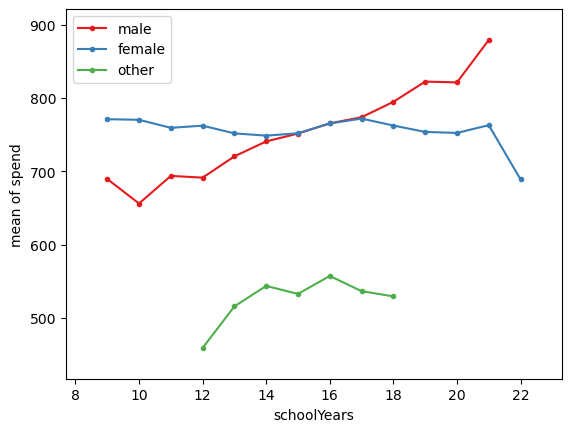

In [47]:
sex_levels = df['sex'].unique()
colors = sns.color_palette('Set1', len(sex_levels))
interaction_plot(x=df['schoolYears'], trace=df['sex'], response=df['spend'], colors=colors)

plt.legend(sex_levels)
plt.show()

In [48]:
income_age_model = ols('spend ~ race * sex * schoolYears + income + age', data=df).fit()
print(income_age_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  spend   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     2510.
Date:                Thu, 05 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:01:50   Log-Likelihood:                -51621.
No. Observations:               10000   AIC:                         1.033e+05
Df Residuals:                    9973   BIC:                         1.035e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [49]:
# Coefficient for 'income' and 'age' are close to 0, 
# meaning the impact is highly significant

#  The adjusted R2 value is 0.867, which means that approximately 86.7% of the variability 
#  in spending can be explained by the model. 
#  This is a significant increase in explanatory power compared to the previous model.

In [50]:
#    Both income and age are significant predictors of spending.
#    Older individuals tend to spend more, with every year of age leading to an approximate increase of $21 in spending.
#    Higher income also leads to higher spending, but the effect size is relatively small.

In [51]:
cor_sy_spend = df['schoolYears'].corr(df['spend'])
cor_sy_spend

0.16006262198098775

In [52]:
#There is a positive correlation between the number of school years and spending. 
#Individuals with more years of education tend to spend slightly more on average, but the effect isn't very pronounced.

In [53]:
## Gender differences in spending are apparent, with males typically spending more than females.
## Age and income are both significant predictors of spending, 
## with older individuals and those with higher incomes tending to spend more.